# 1. Import and Install Dependencies

In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
draw_landmarks(frame,results)

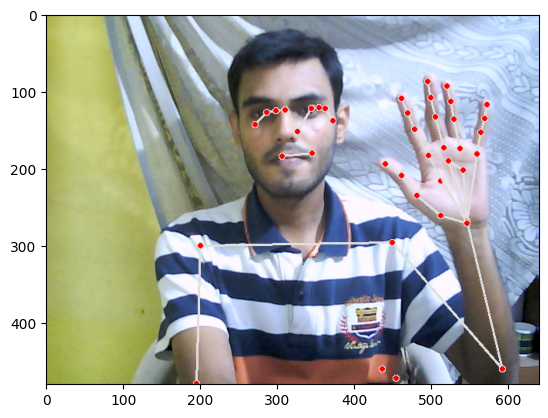

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [16]:
results.pose_landmarks

landmark {
  x: 0.50950414
  y: 0.31716946
  z: -0.58248806
  visibility: 0.999607
}
landmark {
  x: 0.53849185
  y: 0.25456706
  z: -0.49884552
  visibility: 0.99953234
}
landmark {
  x: 0.5537206
  y: 0.2541251
  z: -0.49868876
  visibility: 0.99956965
}
landmark {
  x: 0.56679773
  y: 0.25558418
  z: -0.49821457
  visibility: 0.99954385
}
landmark {
  x: 0.48458472
  y: 0.25975642
  z: -0.5320253
  visibility: 0.9995407
}
landmark {
  x: 0.46575037
  y: 0.26167896
  z: -0.53150064
  visibility: 0.99956816
}
landmark {
  x: 0.44744992
  y: 0.26496255
  z: -0.5318141
  visibility: 0.9995585
}
landmark {
  x: 0.5821334
  y: 0.28809965
  z: -0.0844325
  visibility: 0.99956346
}
landmark {
  x: 0.42386693
  y: 0.29990008
  z: -0.22126079
  visibility: 0.9996969
}
landmark {
  x: 0.53983945
  y: 0.37628764
  z: -0.42968893
  visibility: 0.9996472
}
landmark {
  x: 0.4792831
  y: 0.38406378
  z: -0.4699002
  visibility: 0.9996321
}
landmark {
  x: 0.7018335
  y: 0.6180389
  z: 0.21013811
 

In [17]:
len(results.pose_landmarks.landmark)

33

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose

[array([ 0.50950414,  0.31716946, -0.58248806,  0.99960703]),
 array([ 0.53849185,  0.25456706, -0.49884552,  0.99953234]),
 array([ 0.55372059,  0.25412509, -0.49868876,  0.99956965]),
 array([ 0.56679773,  0.25558418, -0.49821457,  0.99954385]),
 array([ 0.48458472,  0.25975642, -0.53202528,  0.99954069]),
 array([ 0.46575037,  0.26167896, -0.53150064,  0.99956816]),
 array([ 0.44744992,  0.26496255, -0.5318141 ,  0.99955851]),
 array([ 0.58213341,  0.28809965, -0.0844325 ,  0.99956346]),
 array([ 0.42386693,  0.29990008, -0.22126079,  0.99969691]),
 array([ 0.53983945,  0.37628764, -0.42968893,  0.9996472 ]),
 array([ 0.47928309,  0.38406378, -0.46990019,  0.99963212]),
 array([0.70183349, 0.61803889, 0.21013811, 0.99891096]),
 array([ 0.31312096,  0.62538779, -0.2338701 ,  0.99806601]),
 array([ 0.92592585,  0.95908898, -0.18944494,  0.93750083]),
 array([ 0.30590719,  0.99895769, -0.44282684,  0.73518127]),
 array([ 0.85418177,  0.55907702, -0.79835218,  0.95846111]),
 array([ 0.6

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 5.09504139e-01,  3.17169458e-01, -5.82488060e-01,  9.99607027e-01,
        5.38491845e-01,  2.54567057e-01, -4.98845518e-01,  9.99532342e-01,
        5.53720593e-01,  2.54125088e-01, -4.98688757e-01,  9.99569654e-01,
        5.66797733e-01,  2.55584180e-01, -4.98214573e-01,  9.99543846e-01,
        4.84584719e-01,  2.59756416e-01, -5.32025278e-01,  9.99540687e-01,
        4.65750366e-01,  2.61678964e-01, -5.31500638e-01,  9.99568164e-01,
        4.47449923e-01,  2.64962554e-01, -5.31814098e-01,  9.99558508e-01,
        5.82133412e-01,  2.88099647e-01, -8.44324976e-02,  9.99563456e-01,
        4.23866928e-01,  2.99900085e-01, -2.21260786e-01,  9.99696910e-01,
        5.39839447e-01,  3.76287639e-01, -4.29688931e-01,  9.99647200e-01,
        4.79283094e-01,  3.84063780e-01, -4.69900191e-01,  9.99632120e-01,
        7.01833487e-01,  6.18038893e-01,  2.10138112e-01,  9.98910964e-01,
        3.13120961e-01,  6.25387788e-01, -2.33870104e-01,  9.98066008e-01,
        9.25925851e-01,  

In [24]:
468*3+33*4+21*3+21*3

1662

In [25]:
np.save('0', result_test)

In [26]:
np.load('0.npy')

array([ 5.09504139e-01,  3.17169458e-01, -5.82488060e-01,  9.99607027e-01,
        5.38491845e-01,  2.54567057e-01, -4.98845518e-01,  9.99532342e-01,
        5.53720593e-01,  2.54125088e-01, -4.98688757e-01,  9.99569654e-01,
        5.66797733e-01,  2.55584180e-01, -4.98214573e-01,  9.99543846e-01,
        4.84584719e-01,  2.59756416e-01, -5.32025278e-01,  9.99540687e-01,
        4.65750366e-01,  2.61678964e-01, -5.31500638e-01,  9.99568164e-01,
        4.47449923e-01,  2.64962554e-01, -5.31814098e-01,  9.99558508e-01,
        5.82133412e-01,  2.88099647e-01, -8.44324976e-02,  9.99563456e-01,
        4.23866928e-01,  2.99900085e-01, -2.21260786e-01,  9.99696910e-01,
        5.39839447e-01,  3.76287639e-01, -4.29688931e-01,  9.99647200e-01,
        4.79283094e-01,  3.84063780e-01, -4.69900191e-01,  9.99632120e-01,
        7.01833487e-01,  6.18038893e-01,  2.10138112e-01,  9.98910964e-01,
        3.13120961e-01,  6.25387788e-01, -2.33870104e-01,  9.98066008e-01,
        9.25925851e-01,  

# 4. Setup Folders for Collection

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [28]:
# hello
    ## 0
    ## 1
    ## 2
    ## ...
    ## 29

# thanks


# I love you

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

# 6. Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 258)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(90, 30, 258)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [66]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [67]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [68]:
res = [.7, 0.2, 0.1]

In [69]:
actions[np.argmax(res)]

'hello'

In [70]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [71]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 27ms/step - loss: 1.0479 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.7890 - categorical_accuracy: 0.7294
Epoch 3/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.6478 - categorical_accuracy: 0.7647
Epoch 4/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.6986 - categorical_accuracy: 0.6471
Epoch 5/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.7546 - categorical_accuracy: 0.6824
Epoch 6/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.6628 - categorical_accuracy: 0.7294
Epoch 7/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.7478 - categorical_accuracy: 0.6000
Epoch 8/2000
3/3 [==============================] - 0s 27ms/step - loss: 0.5707 - categorical_accuracy: 0.7294
Epoch 9/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.6483 - categorical_accuracy: 0.7529
E

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237251 (926.76 KB)
Trainable params: 237

# 8. Make Predictions

In [82]:
res = model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [83]:
actions[np.argmax(res[4])]

'hello'

In [84]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [85]:
model.save('action.h5')

del model

In [127]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)

ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue, yhat)

accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [132]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [101]:
cap.release()
cv2.destroyAllWindows()

In [124]:
res[np.argmax(res)] > threshold

True

In [129]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [126]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 28ms/step


array([[9.5067263e-01, 4.1379930e-19, 4.9327374e-02]], dtype=float32)